In [1]:
import tensorboard as tb
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from packaging import version
from scipy import stats
from scipy.interpolate import Rbf


major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.4.0


In [2]:
ENV_NAMES = ['CartPole-v1', 'LunarLander-v2', 'HalfCheetah-v2', 'HalfCheetah-v2-2']
experiment_ids = ["7dskrn61QTe3vpVCZ5CXzA", "Vnb9dMryQvqKfv3Jh9zUMQ","5HBr5xMmSv2uyBP3Jji6uQ", "pmdGmQ0DQzuGqTAMmNujiw"]

experiments = []
# dfs = []
for experiment_id in experiment_ids:
    experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
    experiments.append(experiment)
#     dfs.append(experiment.get_scalars())

In [3]:
ENV_NAMES_2 = ['CartPole-v1', 'LunarLander-v2', 'HalfCheetah-v2']
experiment_ids_2 = ["N6T4MvXPQRCEvamXGNS7Mg", "SNEA3ywGQR6BdqNbwE5Nmw","ehAu5EPfRMeEQgvt1FBMHQ"]

experiments_2 = []
# dfs = []
for experiment_id in experiment_ids_2:
    experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
    experiments_2.append(experiment)
#     dfs.append(experiment.get_scalars())


In [4]:
ENV_NAMES_3 = ['CartPole-v1', 'LunarLander-v2', 'HalfCheetah-v2']
experiment_ids_3 = ["K0ZeGEwMQJej9Kkz5dDu1A", "YFp4EBzORee9iErX2hjKgg","Rh557xb9Q1GcP7e2ZSWlSw"]

experiments_3 = []
# dfs = []
for experiment_id in experiment_ids_3:
    experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
    experiments_3.append(experiment)
#     dfs.append(experiment.get_scalars())

## Pad missing runs of HalfCheetah

- Ours-K7
- VPG
- SVRG
- Ours-K10B3

# Train or Validate?

In [5]:
dfws = []
for experiment in experiments:
    dfw = experiment.get_scalars(pivot=False)
    dfw = dfw[dfw.tag.str.startswith("validate/total")]
    dfws.append(dfw)
for experiment in  experiments_2:
    dfw = experiment.get_scalars(pivot=False)
    dfw = dfw[dfw.tag.str.startswith("validate/total")]
    dfws.append(dfw)
for experiment in  experiments_3:
    dfw = experiment.get_scalars(pivot=False)
    dfw = dfw[dfw.tag.str.startswith("validate/total")]
    dfws.append(dfw)

In [6]:
len(dfws)

10

In [7]:
#origin 0,1,23
#lines 4,5,6
#new 7,8,9

dfws[7] = dfws[7][dfws[7].run.str.contains('20210202T181431')]
dfws[8] = dfws[8].replace('LunarLander-v2/worker10_byzantine3_filtering-attack/Exp3_LunarLander_Ours_W10B3_FA-runs3-5_20210202T071036',
                          'LunarLander-v2/worker10_byzantine3_filtering-attack/Exp3_LunarLander_Ours_W10B3_FA-runs0-2_20210202T071047')
dfws[8] = dfws[8].replace('LunarLander-v2/worker10_byzantine3_filtering-attack/Exp3_LunarLander_Ours_W10B3_FA-runs6-8_20210202T071020',
                          'LunarLander-v2/worker10_byzantine3_filtering-attack/Exp3_LunarLander_Ours_W10B3_FA-runs0-2_20210202T071047')

dfws[9] = dfws[9].replace('HalfCheetah-v2/worker10_byzantine3_filtering-attack/Exp2_HalfCheetah_Ours_W10B3_20210202T190037',
                          'HalfCheetah-v2/worker10_byzantine3_filtering-attack/Exp2_HalfCheetah_Ours_W10B3_20210202T190023')

In [8]:
dfws[2] = dfws[2][~(dfws[2].run.str.contains('Ours_W10B3') & dfws[2].tag.str.contains('_5'))]
dfws[2] = dfws[2][~(dfws[2].run.str.contains('SVRG') & dfws[2].tag.str.contains('_7'))]

dfws[2] = pd.concat([dfws[2], dfws[3]])
dfws[0] = pd.concat([dfws[0], dfws[4]])
dfws[1] = pd.concat([dfws[1], dfws[5]])
dfws[2] = pd.concat([dfws[2], dfws[6]])

In [9]:
# replace
dfws[0] = dfws[0][~(dfws[0].run.str.contains('Ours_W10B3'))]
dfws[0] = pd.concat([dfws[0], dfws[7]])

dfws[1] = dfws[1][~(dfws[1].run.str.contains('Ours_W10B3') & (~dfws[1].tag.str.contains('_9')))]
dfws[1] = pd.concat([dfws[1], dfws[8]])

dfws[2] = dfws[2][~(dfws[2].run.str.contains('Ours_W10B3'))]
dfws[2] = pd.concat([dfws[2], dfws[9]])

In [10]:
dfws[1] = dfws[1].replace(
'LunarLander-v2/worker10_byzantine3_filtering-attack/Exp3_LunarLander_Ours_W10B3_FA-runs0-2_20210202T071047',
'LunarLander-v2/worker10_byzantine3_detect-attack/Exp2_LunarLander_Ours_W10B3_20210120T182105')
dfws[2].run.unique()

array(['HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_SVRG_W10B3_20210120T140357',
       'HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_VPG_W10B3_20210120T140342',
       'HalfCheetah-v2/worker7_byzantine0_detect-attack/Exp2_HalfCheetah_Ours_W7B0_20210120T140410',
       'HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_SVRG_W10B3_20210123T233059',
       'HalfCheetah-v2/worker10_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W10_20210120T201248',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W1_20210120T201241',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_SVRG_W1_20210120T201238',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_VPG_W1_20210120T201240',
       'HalfCheetah-v2/worker3_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W3_20210121T044012',
       'HalfCheetah-v2/worker10_byzantine3_filtering-attack/Exp2_HalfCheetah_Ours_W10B3_20

In [11]:
experiments = experiments[:3]
dfws = dfws[:3]

# Plot configurations


In [12]:
################# CartPole, LunarLander, HalfCheetah
max_trajectories_ls = [int(5e3), int(1e4), int(1e4)]
max_runs = 10
interval = 0.90

# Plot!

['Exp2_CartPole_SVRG_W10B3', 'Exp2_CartPole_VPG_W10B3', 'Exp2_CartPole_Ours_W7B0', 'Exp1_Cartpole_Ours_W10_WithFilter', 'Exp1_Cartpole_Ours_W1', 'Exp1_Cartpole_SVRG_W1', 'Exp1_Cartpole_VPG_W1', 'Exp1_Cartpole_Ours_W3', 'Exp3_CartPole_Ours_W10B3']
['Exp2_LunarLander_Ours_W10B3', 'Exp2_LunarLander_SVRG_W10B3', 'Exp2_LunarLander_VPG_W10B3', 'Exp2_LunarLander_Ours_W7B0', 'Exp1_LunarLander_Ours_W10_WithFilter', 'Exp1_LunarLander_Ours_W1', 'Exp1_LunarLander_SVRG_W1', 'Exp1_LunarLander_VPG_W1', 'Exp1_LunarLander_Ours_W3']
['Exp2_HalfCheetah_SVRG_W10B3', 'Exp2_HalfCheetah_VPG_W10B3', 'Exp2_HalfCheetah_Ours_W7B0', 'Exp1_HalfCheetah2_Ours_W10', 'Exp1_HalfCheetah2_Ours_W1', 'Exp1_HalfCheetah2_SVRG_W1', 'Exp1_HalfCheetah2_VPG_W1', 'Exp1_HalfCheetah2_Ours_W3', 'Exp2_HalfCheetah_Ours_W10B3']


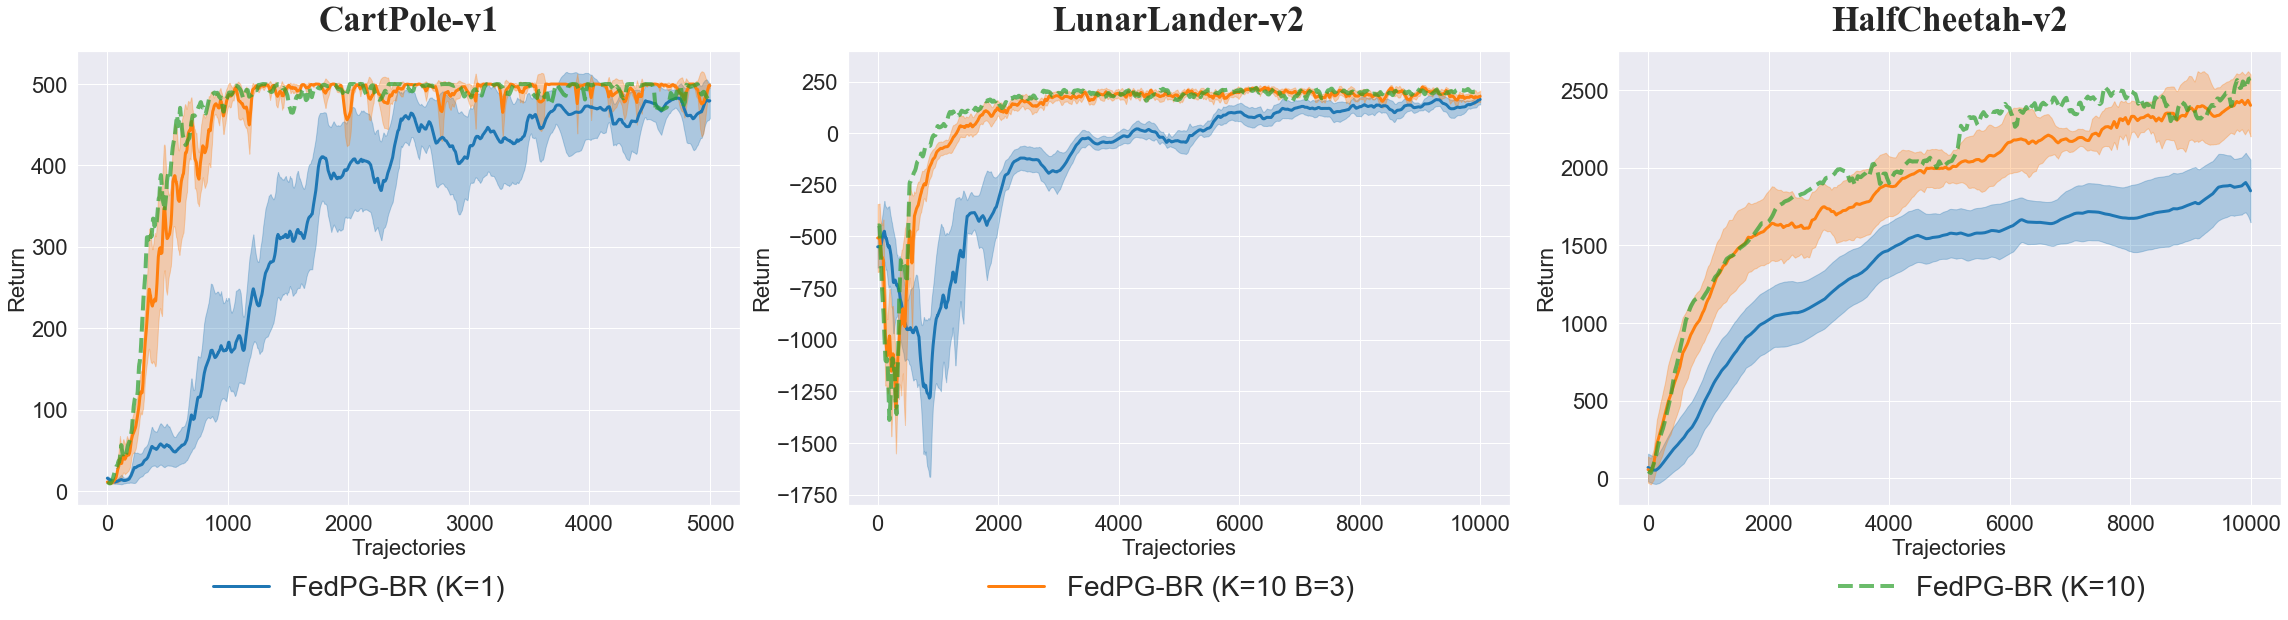

In [26]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(32,8))
# colors =  ['#9467bd', '#d62728', '#e89216'][::-1]
colors = [ u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#8c564b']


for plot_id in range(3):
    
    dfw = dfws[plot_id]
    max_trajectories = max_trajectories_ls[plot_id]
    
    runs = dfw["run"].unique()
    runs_ordered = []
    runs_ordered_labels = []
    
    runs_name = []
    for name in runs:
        name = '_'.join((name.split('/')[-1].split('_')[:-1]))
        if not name in runs_name: runs_name.append(name)
    
    for i in range(6):
        for name in runs_name:
            if i == 0 and 'VPG' in name:
                pass
#                 runs_ordered.append(name)
#                 runs_ordered_labels.append('GPOMDP')
            elif i == 1 and 'SVRG' in name:
                pass
#                 runs_ordered.append(name)
#                 runs_ordered_labels.append('SVRPG')
            elif i == 3 and 'Ours' in name and 'W10B3' in name:
                runs_ordered.append(name)
                runs_ordered_labels.append('FedPG-BR (K=10 B=3)')
            elif i == 4 and 'Ours' in name and ('_W10_' in name or name[-4:] == '_W10'):
                runs_ordered.append(name)
                runs_ordered_labels.append('FedPG-BR (K=10)')
            elif i == 2 and 'Ours' in name and name[-3:] == '_W1':
                runs_ordered.append(name)
                runs_ordered_labels.append('FedPG-BR (K=1)')
    
    print(runs_name)
    
    for idx, run_name in enumerate(runs_ordered):
        run_name += '_'
        if 'W10_' in run_name:
            cur_dfw = dfw[dfw.run.str.contains(f'{run_name}')]
            lines = []
            for run_id in range(max_runs):
                steps = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['step'].to_numpy()
                values = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['value'].to_numpy()
                lines.append(Rbf(steps, values, function = 'linear')(np.arange(max_trajectories)))
            
            mean = np.mean(lines, axis=0)
            axes[plot_id].plot(mean, label=(f"{runs_ordered_labels[idx]}"), linewidth=4., linestyle = 'dashed', alpha = 0.7, color = colors[idx])
            
            
        else:
            
            cur_dfw = dfw[dfw.run.str.contains(f'{run_name}')]
            lines = []
#             print(cur_dfw.tag.unique())
            for run_id in cur_dfw.tag.unique():
                steps = cur_dfw[cur_dfw.tag.str.contains(f'{run_id}')]['step'].to_numpy()
                values = cur_dfw[cur_dfw.tag.str.contains(f'{run_id}')]['value'].to_numpy()
                if steps.size < 50:
                    continue
                else:
#                     print(run_name, run_id)
                    pass
                lines.append(Rbf(steps, values, function = 'linear')(np.arange(max_trajectories)))
            mean = np.mean(lines, axis=0)
            l, h = stats.norm.interval(interval, loc=np.mean(lines, axis = 0), scale=stats.sem(lines, axis = 0))
            axes[plot_id].plot(mean, label=(f"{runs_ordered_labels[idx]}"), linewidth=3, color = colors[idx])
            axes[plot_id].fill_between(range(int(max_trajectories)), l, h, alpha = 0.3, color = colors[idx])    

                
        # set limit for LunarLander
        if plot_id == 1:
            axes[plot_id].set_ylim(-1800,400)

#         axes[plot_id].xlabel("Trajectories")
#         axes[plot_id].ylabel("Return")
        axes[plot_id].set_title(ENV_NAMES[plot_id], fontsize=35, 
                                pad=20,
                                fontname='Times New Roman')
        axes[plot_id].tick_params(labelsize=22)
        
        axes[plot_id].set_xlabel("Trajectories", fontsize=22)
        axes[plot_id].set_ylabel("Return", fontsize=22)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)
# plt.legend(loc='bottom', 
#            ncol=1, 
#            handlelength=1,
#            mode="expand", 
#            bbox_to_anchor=(1.05, 0, 1,0), borderaxespad=0, prop={'size': 13})
plt.tight_layout(pad=1)


# plt.rcParams["font.family"] = "Times New Roman"

# Shrink current axis's height by 10% on the bottom

length_ = (axes[2].get_position().x1 - axes[0].get_position().x0) / (axes[0].get_position().x1 - axes[0].get_position().x0)

# Put a legend below current axis
plt_lgd = plt.legend(loc='upper left', bbox_to_anchor=(length_ * 0.05, -0.1, length_ * 0.9, 0), bbox_transform=axes[0].transAxes,
         mode = "expand", fancybox=False, shadow=False, ncol=5, fontsize = 28, frameon=False)

plt.savefig('./exp3-new.svg', format='svg', dpi=600,
            bbox_extra_artists=(plt_lgd,), bbox_inches='tight')
plt.show()

In [14]:
runs

array(['HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_SVRG_W10B3_20210120T140357',
       'HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_VPG_W10B3_20210120T140342',
       'HalfCheetah-v2/worker7_byzantine0_detect-attack/Exp2_HalfCheetah_Ours_W7B0_20210120T140410',
       'HalfCheetah-v2/worker10_byzantine3_detect-attack/Exp2_HalfCheetah_SVRG_W10B3_20210123T233059',
       'HalfCheetah-v2/worker10_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W10_20210120T201248',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W1_20210120T201241',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_SVRG_W1_20210120T201238',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_VPG_W1_20210120T201240',
       'HalfCheetah-v2/worker3_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W3_20210121T044012',
       'HalfCheetah-v2/worker10_byzantine3_filtering-attack/Exp2_HalfCheetah_Ours_W10B3_20